# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from pandas.io.json import json_normalize

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(api_key)

e8251322639999fa08bcd102f57a8e15


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [91]:
# this block of code reads data from the api, checks to see if the city is real, and then saves its data to several lists

# url for API
url = "http://api.openweathermap.org/data/2.5/weather?"

# list for storing all json sets
weather_data = []

# iterables for print lines
i = 1
set_number = 1

# individual lists for data
city_list = []
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

# loop through all randomly generated cities
for city in cities:
    # create query_url based on api key, city name, and set units to metric
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    # get response from api
    weather_response = requests.get(query_url)
    # convert json
    weather_json = weather_response.json()
    
    # check to see if the entry has a name, and if it does, save all its data
    try:
        weather_json["name"]
        weather_data.append(weather_json)
        city_list.append(weather_json["name"])
        clouds.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        latitude.append(weather_json["coord"]["lat"])
        longitude.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])

        print(f'Processing record {i} of Set {set_number} | {city}')
        
        # iterate record number and set number
        if i == 50:
            i = 1
            set_number = set_number + 1 
        else:
            i = i + 1
    # if no name is found, skip city and move on to the next one
    except:
        print("City not found.  Skipping...")
        
# once loop has finished, print notification
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")


City not found.  Skipping...
Processing record 1 of Set 1 | dikson
Processing record 2 of Set 1 | ushuaia
Processing record 3 of Set 1 | chokurdakh
Processing record 4 of Set 1 | busselton
Processing record 5 of Set 1 | pisco
Processing record 6 of Set 1 | avarua
Processing record 7 of Set 1 | vanavara
Processing record 8 of Set 1 | butaritari
Processing record 9 of Set 1 | tuktoyaktuk
Processing record 10 of Set 1 | zhigalovo
Processing record 11 of Set 1 | jollyville
Processing record 12 of Set 1 | port keats
Processing record 13 of Set 1 | nanortalik
Processing record 14 of Set 1 | saldanha
Processing record 15 of Set 1 | arraial do cabo
Processing record 16 of Set 1 | kodiak
Processing record 17 of Set 1 | ancud
Processing record 18 of Set 1 | bluff
Processing record 19 of Set 1 | khatanga
Processing record 20 of Set 1 | faanui
Processing record 21 of Set 1 | hobart
City not found.  Skipping...
Processing record 22 of Set 1 | carnarvon
Processing record 23 of Set 1 | itoman
Process

City not found.  Skipping...
Processing record 33 of Set 4 | havre-saint-pierre
City not found.  Skipping...
Processing record 34 of Set 4 | saskylakh
Processing record 35 of Set 4 | mizdah
Processing record 36 of Set 4 | calafell
Processing record 37 of Set 4 | tecoanapa
Processing record 38 of Set 4 | avera
City not found.  Skipping...
Processing record 39 of Set 4 | namanga
Processing record 40 of Set 4 | richards bay
Processing record 41 of Set 4 | samarai
Processing record 42 of Set 4 | namibe
Processing record 43 of Set 4 | ust-kuyga
Processing record 44 of Set 4 | safranbolu
Processing record 45 of Set 4 | kerman
Processing record 46 of Set 4 | dingle
City not found.  Skipping...
Processing record 47 of Set 4 | yar-sale
Processing record 48 of Set 4 | tamworth
City not found.  Skipping...
Processing record 49 of Set 4 | alice springs
Processing record 50 of Set 4 | codrington
Processing record 1 of Set 5 | bathsheba
Processing record 2 of Set 5 | amapa
Processing record 3 of Set

Processing record 20 of Set 8 | rudnya
Processing record 21 of Set 8 | hue
Processing record 22 of Set 8 | pacific grove
Processing record 23 of Set 8 | banda aceh
Processing record 24 of Set 8 | ivanivka
Processing record 25 of Set 8 | ust-tsilma
Processing record 26 of Set 8 | yumen
Processing record 27 of Set 8 | san cristobal
Processing record 28 of Set 8 | svetlaya
City not found.  Skipping...
Processing record 29 of Set 8 | victoria
Processing record 30 of Set 8 | guarare
City not found.  Skipping...
Processing record 31 of Set 8 | kisangani
Processing record 32 of Set 8 | kruisfontein
Processing record 33 of Set 8 | fort saint james
Processing record 34 of Set 8 | vao
Processing record 35 of Set 8 | bubaque
Processing record 36 of Set 8 | luderitz
Processing record 37 of Set 8 | tiruchchendur
Processing record 38 of Set 8 | tvoroyri
Processing record 39 of Set 8 | encruzilhada do sul
City not found.  Skipping...
Processing record 40 of Set 8 | borgarnes
Processing record 41 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
# use lists generated in for loop to create data frame
weather_df = pd.DataFrame({"City":city_list,
                          "Cloudiness (%)":clouds,
                          "Country":country,
                          "Date":date,
                          "Humidity (%)":humidity,
                          "Latitude":latitude,
                          "Longitude":longitude,
                          "Max Temp (F)":max_temp,
                          "Wind Speed (mph)":wind_speed})

# save data frame to csv file without index
weather_df.to_csv(output_data_file,index=False)

# disply data frame
weather_df.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Latitude,Longitude,Max Temp (F),Wind Speed (mph)
0,Dikson,100,RU,1577106288,91,73.51,80.55,-3.30,9.69
1,Ushuaia,75,AR,1577106419,81,-54.81,-68.31,50.00,32.21
2,Chokurdakh,100,RU,1577106419,93,70.62,147.90,-23.82,4.45
3,Busselton,100,AU,1577106419,41,-33.64,115.35,69.01,16.75
4,Pisco,67,PE,1577106419,30,-13.71,-76.20,71.60,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

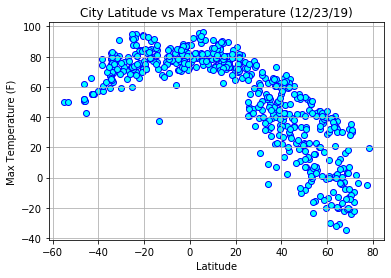

In [113]:
plt.scatter(weather_df["Latitude"].to_list(),weather_df["Max Temp (F)"].to_list(),color="cyan",edgecolors="blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (12/23/19)")
plt.savefig("LatVsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

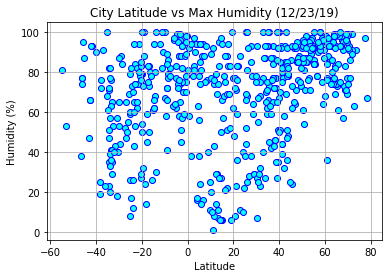

In [114]:
plt.scatter(weather_df["Latitude"].to_list(),weather_df["Humidity (%)"].to_list(),color="cyan",edgecolors="blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Max Humidity (12/23/19)")
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

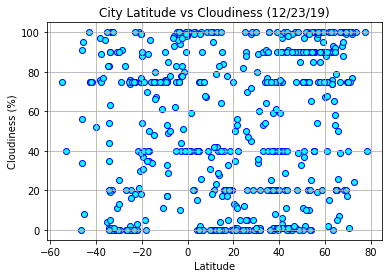

In [115]:
plt.scatter(weather_df["Latitude"].to_list(),weather_df["Cloudiness (%)"].to_list(),color="cyan",edgecolors="blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (12/23/19)")
plt.savefig("LatVsCloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

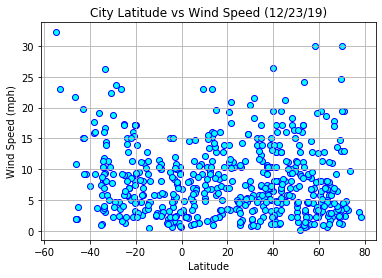

In [116]:
plt.scatter(weather_df["Latitude"].to_list(),weather_df["Wind Speed (mph)"].to_list(),color="cyan",edgecolors="blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (12/23/19)")
plt.savefig("LatVsWind.png")
plt.show()